In [17]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [18]:
df= sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
df2=df.copy()

Identify relationship among different variables(PairGrid and pairplot)

Using PairGrid

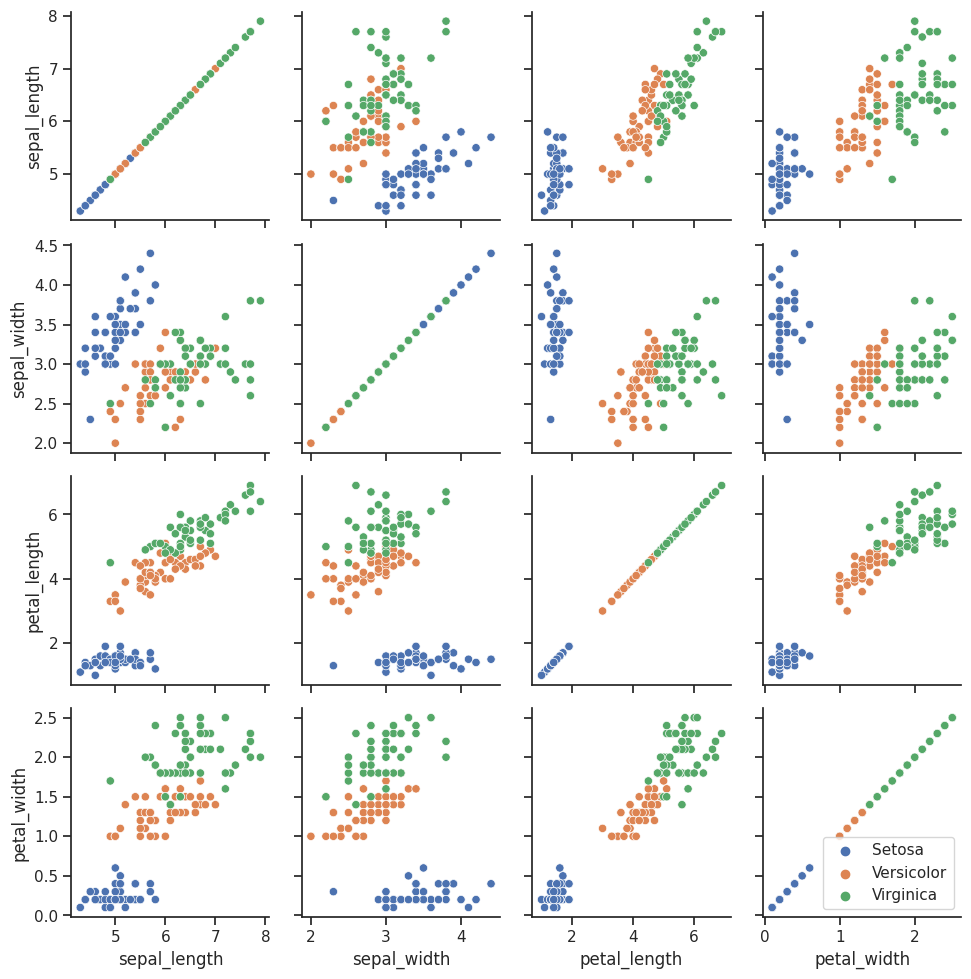

In [21]:
# Using PairGrid
sns.set(style='ticks', color_codes=True)
ScatterMatrix=sns.PairGrid(df2,hue='species')
ScatterMatrix.map(sns.scatterplot)
legend=plt.legend()
legend.texts[0].set_text("Setosa")
legend.texts[1].set_text("Versicolor")
legend.texts[2].set_text("Virginica")

plt.show()


Using pairplot

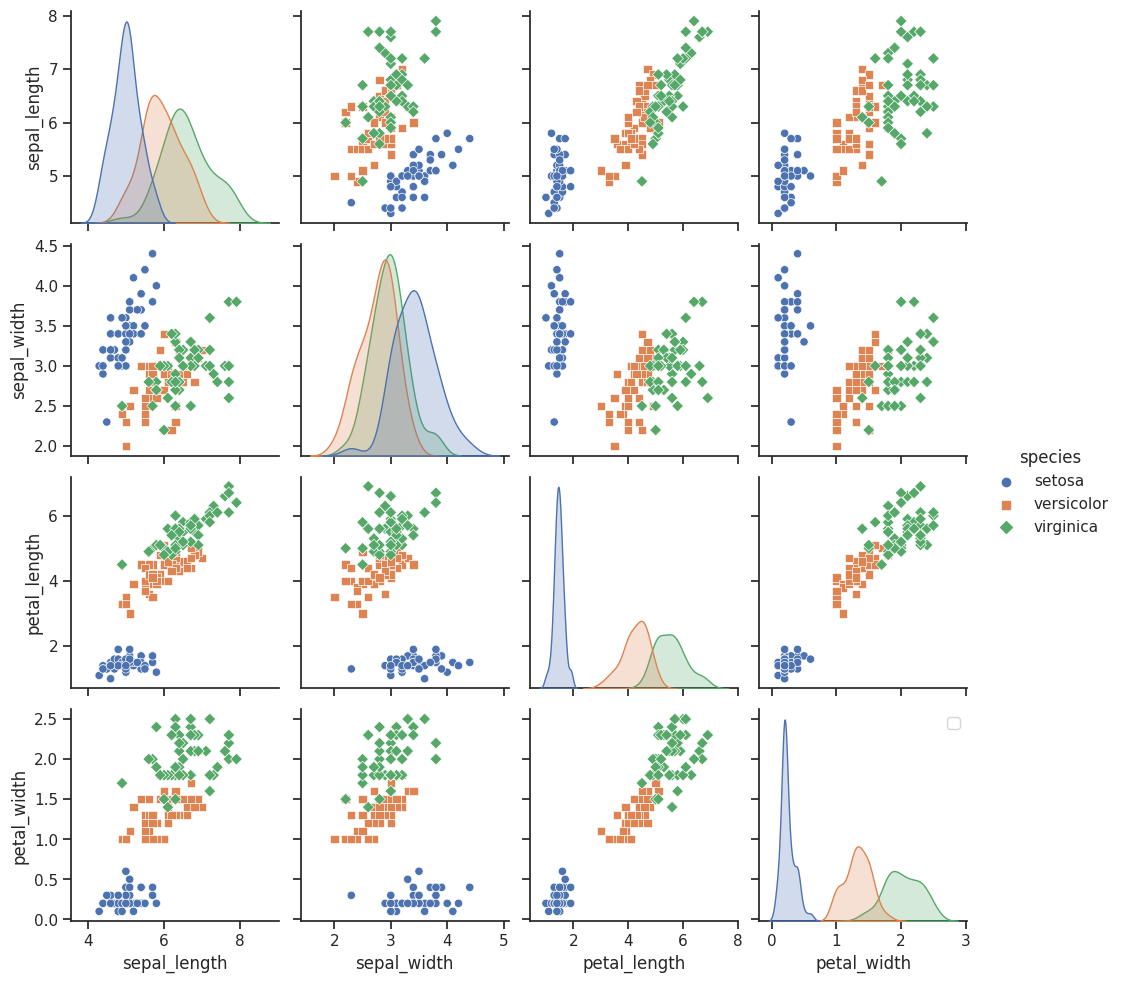

In [22]:
# Markers for each species
marker_dict={'setosa':'o','versicolor':'s','virginica':'D'}

# Using pairplot
sns.set(style='ticks',color_codes=True)
sns.pairplot(df,hue='species',markers=marker_dict)

legend=plt.legend()
if len(legend.texts)>=3:
    legend.texts[0].set_text("Setosa")
    legend.texts[1].set_text("Versicolor") #pairplot, scatterplot
    legend.texts[2].set_text("Virginica")

plt.show()


**scatter plot matrix using Pandas and Matplotlib**

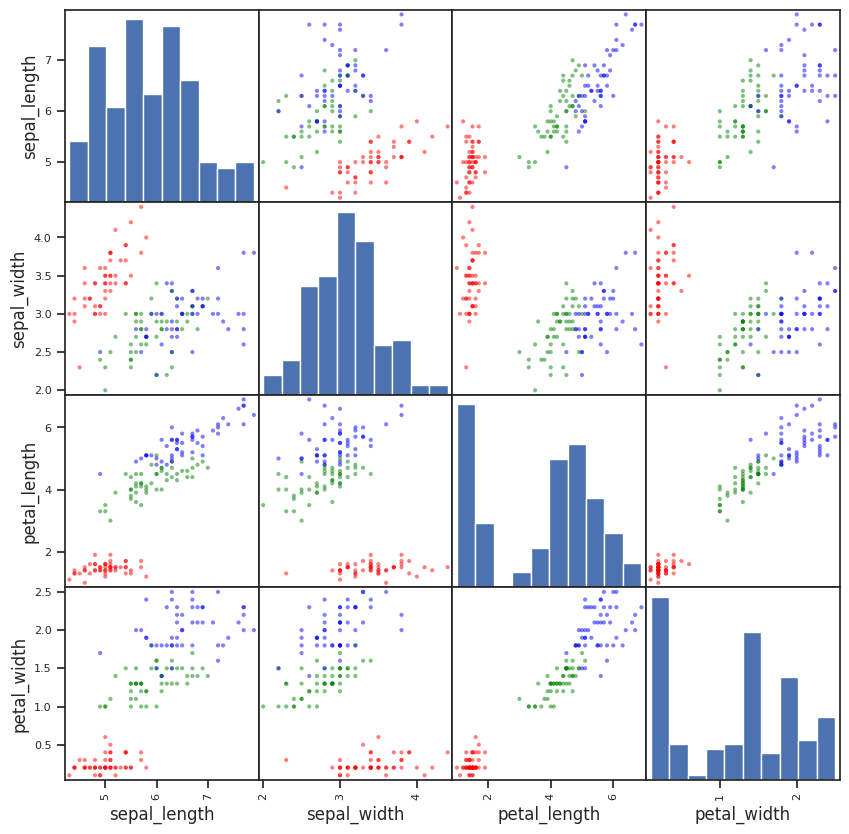

In [23]:
# Create a scatter plot matrix using Pandas and Matplotlib with different colors for each species
colors = ['red', 'green', 'blue']  # Define colors for each species

# Assign colors based on species
color_mapping = {species: color for species, color in zip(df['species'].unique(), colors)}
colors = df['species'].map(color_mapping)

# Create a scatter plot matrix using Pandas and Matplotlib
pd.plotting.scatter_matrix(df, figsize=(10, 10),c=colors)
plt.show()


Add additional features to the DataFrame


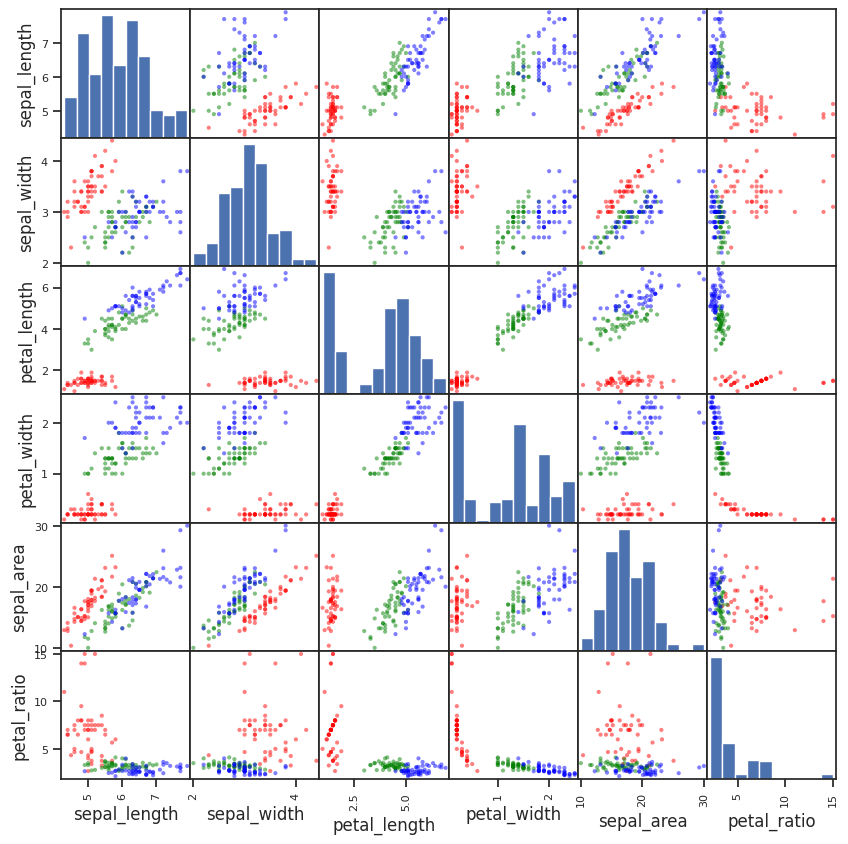

In [24]:
# Add additional features to the DataFrame
df2['sepal_area'] = df2['sepal_length'] * df2['sepal_width']
df2['petal_ratio'] = df2['petal_length'] / df2['petal_width']

colors = ['red', 'green', 'blue']  # Define colors for each species

# Assign colors based on species
color_mapping = {species: color for species, color in zip(df['species'].unique(), colors)}
colors = df['species'].map(color_mapping)

# Create a scatter plot matrix using Pandas and Matplotlib
pd.plotting.scatter_matrix(df2, figsize=(10, 10),c=colors)
plt.show()


After Adding Features

<Figure size 1000x1000 with 0 Axes>

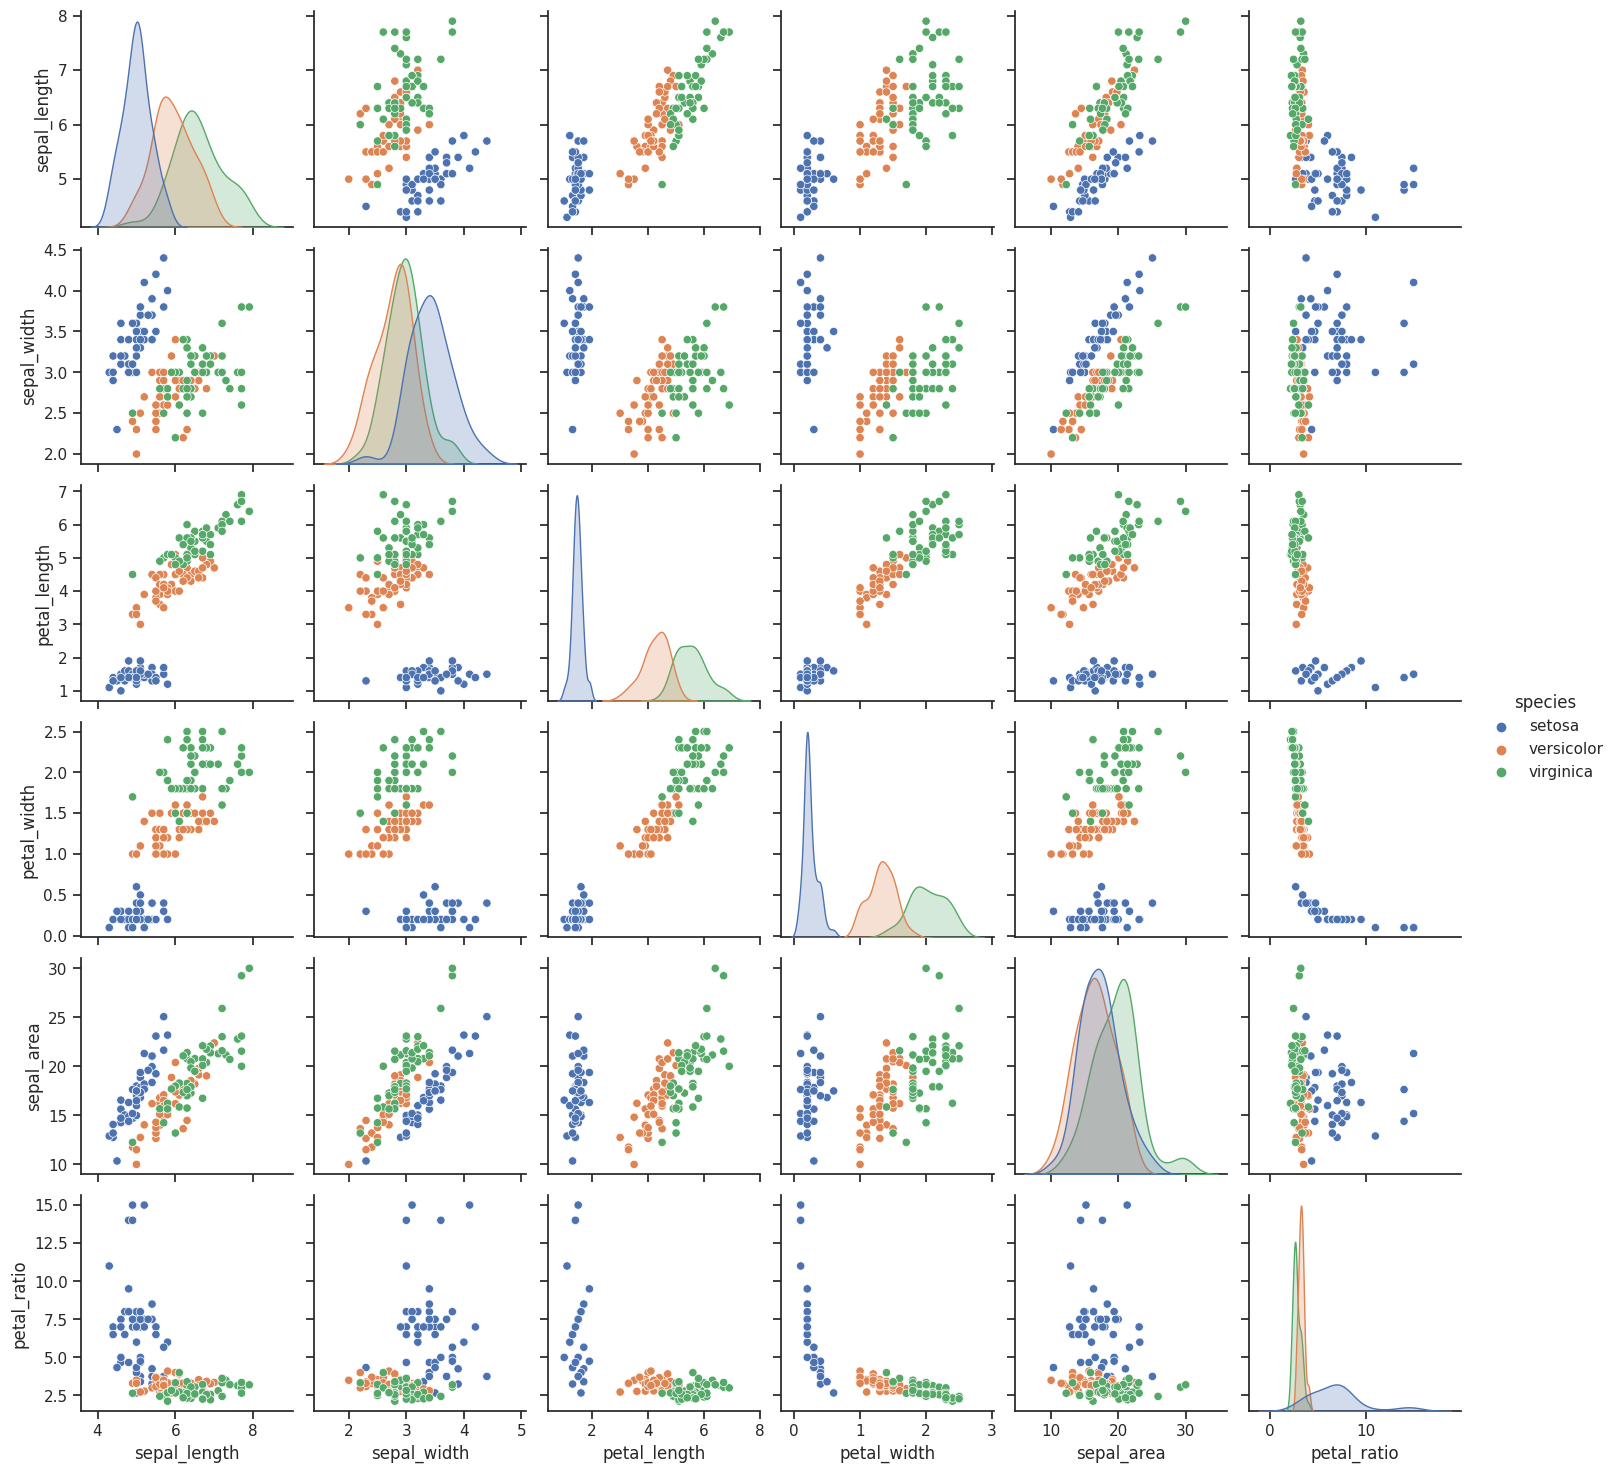

In [25]:
sns.set_palette("Set1")
plt.figure(figsize=(10, 10))

# Create a pair plot for all four features
sns.set(style="ticks")
sns.pairplot(df2, hue="species")

# Display the plot
plt.show()


Check which classes are linearly separable (By  Scatterplot, pairplot matrix and Evaluate the classifier's performance)

Scatterplots for all the combinations

**From the resulting plot, it appears that the setosa species is linearly separable from the other two species, while versicolor and virginica are not easily separated.**

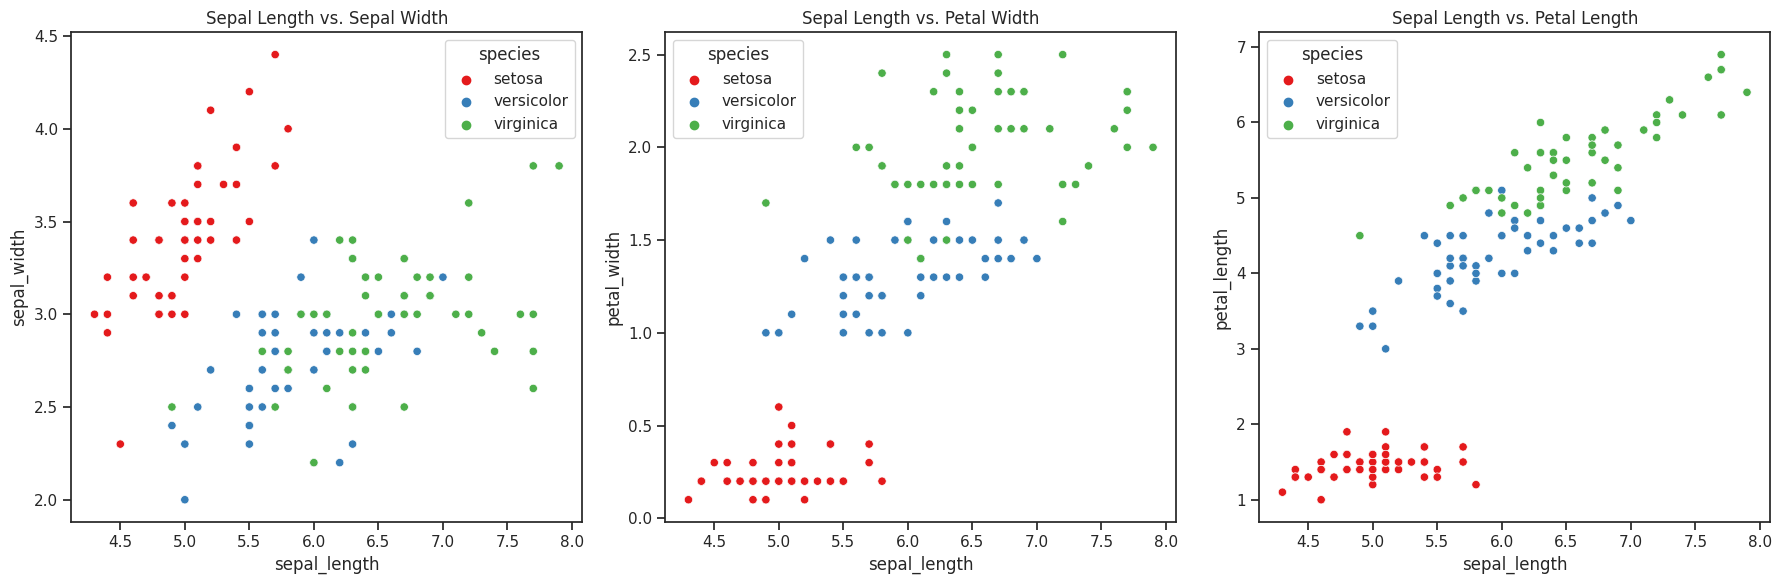

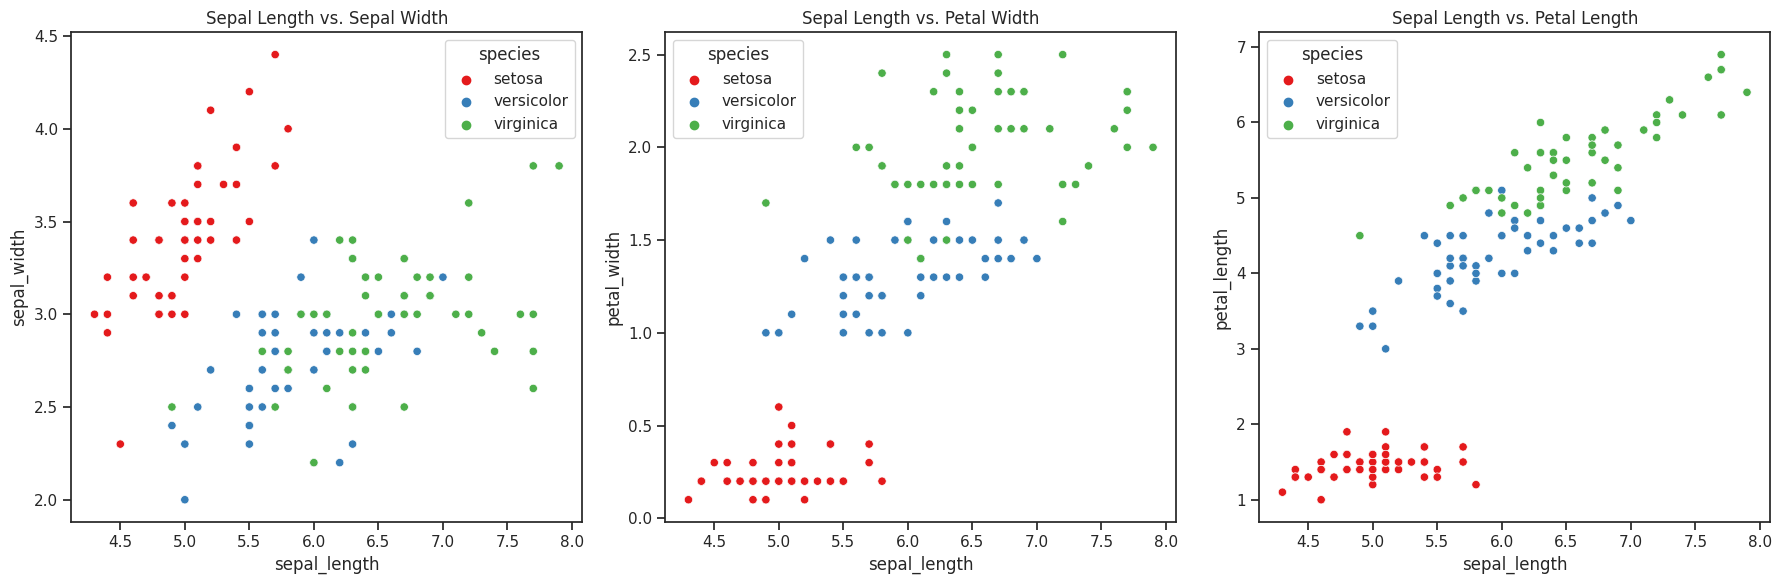

In [26]:
# Set color palette for species
sns.set_palette("Set1")

fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot 1,2,3
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, ax=axes1[0])
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=df, ax=axes1[1])
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, ax=axes1[2])

axes1[0].set_title('Sepal Length vs. Sepal Width')
axes1[1].set_title('Sepal Length vs. Petal Width')
axes1[2].set_title('Sepal Length vs. Petal Length')

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot 1
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, ax=axes2[0])

# Scatter plot 2
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=df, ax=axes2[1])

# Scatter plot 3
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, ax=axes2[2])

# Set titles for each subplot
axes2[0].set_title('Sepal Length vs. Sepal Width')
axes2[1].set_title('Sepal Length vs. Petal Width')
axes2[2].set_title('Sepal Length vs. Petal Length')

plt.tight_layout()
plt.show()


' From the resulting plot, it appears that the setosa species is linearly separable from the other two species,\n while versicolor and virginica are not easily separated.'

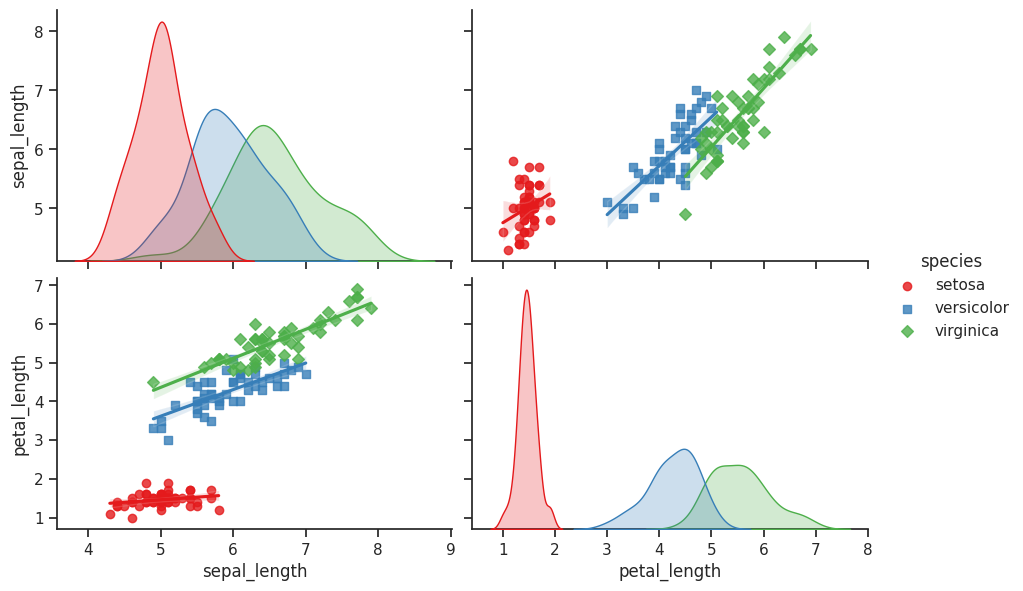

In [27]:
# pairplot matrix
sns.pairplot(data=df, hue='species', height=3, aspect=1.5, markers=['o', 's', 'D'], diag_kind='kde', vars=['sepal_length', 'petal_length'], kind='reg')


""" From the resulting plot, it appears that the setosa species is linearly separable from the other two species,
 while versicolor and virginica are not easily separated."""

**If the classifier achieves perfect accuracy on both classes,
 we print a message indicating that the two classes are linearly separable.**

In [28]:
# By evaluation of classisier's performance
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the classifier's performance
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Check which classes are linearly separable
for i, class1 in enumerate(df['species'].unique()):
    for class2 in df['species'].unique()[i+1:]:
        X_class1 = X[y == class1]
        X_class2 = X[y == class2]
        y_class1 = y[y == class1]
        y_class2 = y[y == class2]
        svm = SVC(kernel='linear')
        svm.fit(pd.concat([X_class1, X_class2]), pd.concat([y_class1, y_class2]))
        if svm.score(X_class1, y_class1) == 1.0 and svm.score(X_class2, y_class2) == 1.0:
            print(f"{class1} and {class2} are linearly separable")


Accuracy: 1.00
setosa and versicolor are linearly separable
setosa and virginica are linearly separable


2nd Dataset

In [29]:
df3=pd.read_csv("/content/adult.csv.zip")
df3.head(15)

age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831       HS-grad                9   
14   48           Private  279724       HS-grad                9   

        marital-status         occupation   relationship   race  gender  \
0        Never-married  Machine-op-inspct      Own-child  Black    Male   
1   Married-civ-spouse    Farming-fishing        Husband  White    Male   
2   Married-civ-spouse    Protective-serv        Husband  White    Male   
3   Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4        Never-married                  ?      Own-child  White  Female   
5        Never-married      Other-service  Not-in-family  White    Male   
6        Never-married                  ?      Unmarried  Black    Male   
7   Married-civ-spouse     Prof-specialty        Husband  White    Male   
8        Never-married      Other-service      Unmarried  White  Female   
9   Married-civ-spouse       Craft-repair        Husband  White    Male   
10  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
11  Married-civ-spouse       Adm-clerical        Husband  White    Male   
12       Never-married       Adm-clerical  Not-in-family  White  Female   
13  Married-civ-spouse                  ?        Husband  White    Male   
14  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   

    capital-gain  capital-loss  hours-per-week native-country income  
0              0             0              40  United-States  <=50K  
1              0             0              50  United-States  <=50K  
2              0             0              40  United-States   >50K  
3           7688             0              40  United-States   >50K  
4              0             0              30  United-States  <=50K  
5              0             0              30  United-States  <=50K  
6              0             0              40  United-States  <=50K  
7           3103             0              32  United-States   >50K  
8              0             0              40  United-States  <=50K  
9              0             0              10  United-States  <=50K  
10          6418             0              40  United-States   >50K  
11             0             0              40  United-States  <=50K  
12             0             0              39  United-States  <=50K  
13             0             0              35  United-States  <=50K  
14          3103             0              48  United-States   >50K

In [30]:
# Replace Missing Values
df3[df3=='?']=np.nan
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [31]:
for col in ['workclass','occupation','native-country']:
    df3[col].fillna(df3[col].mode()[0],inplace=True)

df3.head(15)

age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18           Private  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29           Private  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58           Private  299831       HS-grad                9   
14   48           Private  279724       HS-grad                9   

        marital-status         occupation   relationship   race  gender  \
0        Never-married  Machine-op-inspct      Own-child  Black    Male   
1   Married-civ-spouse    Farming-fishing        Husband  White    Male   
2   Married-civ-spouse    Protective-serv        Husband  White    Male   
3   Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4        Never-married     Prof-specialty      Own-child  White  Female   
5        Never-married      Other-service  Not-in-family  White    Male   
6        Never-married     Prof-specialty      Unmarried  Black    Male   
7   Married-civ-spouse     Prof-specialty        Husband  White    Male   
8        Never-married      Other-service      Unmarried  White  Female   
9   Married-civ-spouse       Craft-repair        Husband  White    Male   
10  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
11  Married-civ-spouse       Adm-clerical        Husband  White    Male   
12       Never-married       Adm-clerical  Not-in-family  White  Female   
13  Married-civ-spouse     Prof-specialty        Husband  White    Male   
14  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   

    capital-gain  capital-loss  hours-per-week native-country income  
0              0             0              40  United-States  <=50K  
1              0             0              50  United-States  <=50K  
2              0             0              40  United-States   >50K  
3           7688             0              40  United-States   >50K  
4              0             0              30  United-States  <=50K  
5              0             0              30  United-States  <=50K  
6              0             0              40  United-States  <=50K  
7           3103             0              32  United-States   >50K  
8              0             0              40  United-States  <=50K  
9              0             0              10  United-States  <=50K  
10          6418             0              40  United-States   >50K  
11             0             0              40  United-States  <=50K  
12             0             0              39  United-States  <=50K  
13             0             0              35  United-States  <=50K  
14          3103             0              48  United-States   >50K

In [32]:
print(df3['race'].unique())

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [33]:
print(df3['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [34]:
# Rename th values of race column
df3['race'] = df3['race'].replace({'Asian-Pac-Islander': 'Asian', 'Amer-Indian-Eskimo':'American'})


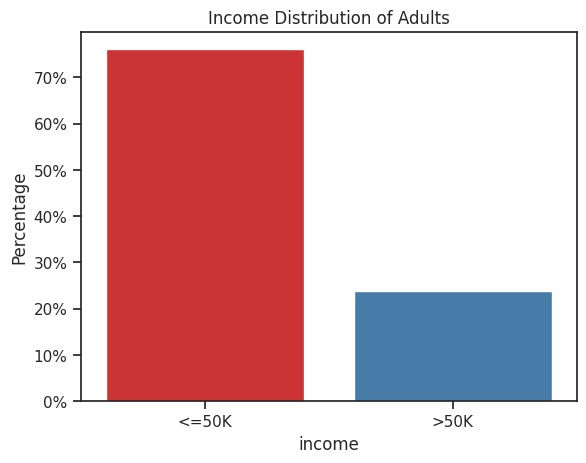

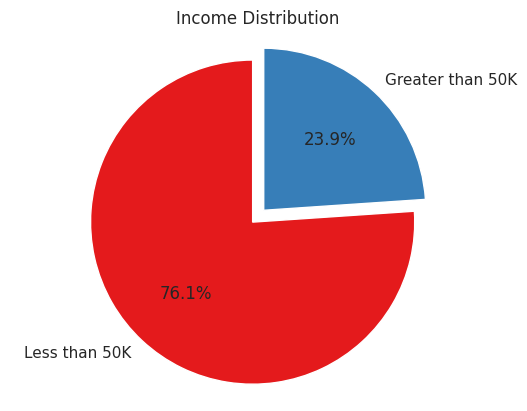

In [35]:
# Create percentage bar chart using sns.barplot
percentage=df3['income'].value_counts(normalize=True).rename_axis('income').reset_index(name='Percentage')
ax1=sns.barplot(x='income', y='Percentage', data=percentage)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df3['income']))
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 3
    ax1.annotate(percentage, (x, y), size=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Income Distribution of Adults')

# Create pie chart of income distribution
labels=['Less than 50K', 'Greater than 50K']
sizes=[df3['income'].value_counts()[0],df3['income'].value_counts()[1]]
explode=(0.1, 0)
fig,ax2=plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
plt.title('Income Distribution')

plt.show()


<ipython-input-36-bb6b8eac2f6d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['age'],shade=True,color="r",ax=axs[0])
<ipython-input-36-bb6b8eac2f6d>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['hours-per-week'],shade=True,color="b",ax=axs[1])
<ipython-input-36-bb6b8eac2f6d>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['educational-num'], shade=True, color="g", ax=axs[2])


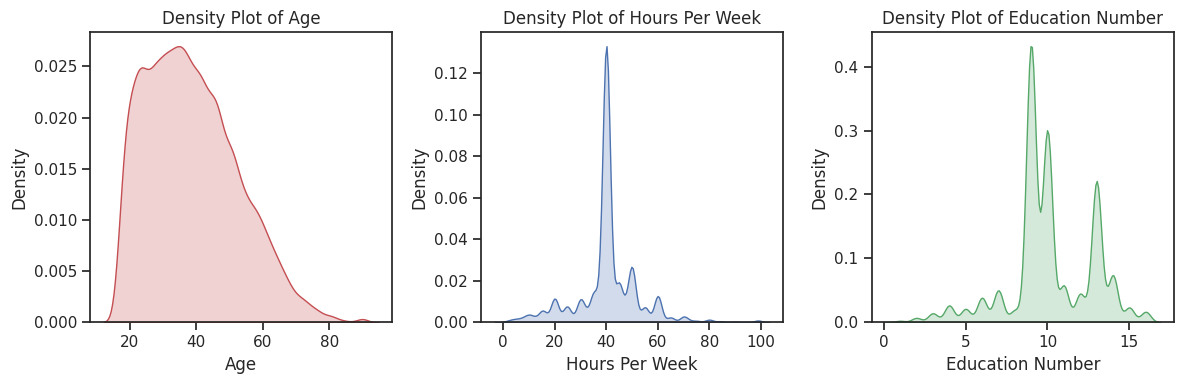

In [36]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Density plot for 'age' 
sns.kdeplot(df3['age'],shade=True,color="r",ax=axs[0])
axs[0].set_title("Density Plot of Age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Density")

# Density plot for 'hours-per-week' 
sns.kdeplot(df3['hours-per-week'],shade=True,color="b",ax=axs[1])
axs[1].set_title("Density Plot of Hours Per Week")
axs[1].set_xlabel("Hours Per Week")
axs[1].set_ylabel("Density")

# Density plot for 'educational-num' 
sns.kdeplot(df3['educational-num'], shade=True, color="g", ax=axs[2])
axs[2].set_title("Density Plot of Education Number")
axs[2].set_xlabel("Education Number")
axs[2].set_ylabel("Density")

plt.tight_layout()
plt.show()


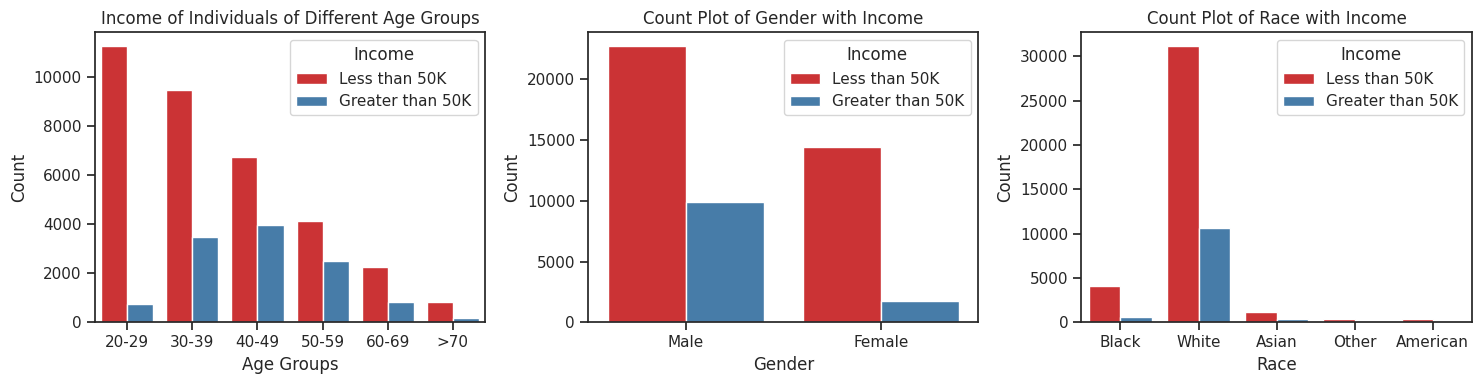

In [37]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
df3['age_group'] = pd.cut(df3['age'], bins=[19, 29, 39, 49, 59, 69, 100], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '>70'])

# Count plot for 'age_group' 
sns.countplot(data=df3, x='age_group', hue='income', ax=axs[0])
axs[0].set_title("Income of Individuals of Different Age Groups")
axs[0].set_xlabel("Age Groups")
axs[0].set_ylabel("Count")
axs[0].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

# Count plot for 'gender' 
sns.countplot(data=df3, x='gender', hue='income', ax=axs[1])
axs[1].set_title("Count Plot of Gender with Income")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Count")
axs[1].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

# Count plot for 'race'
sns.countplot(data=df3, x='race', hue='income', ax=axs[2])
axs[2].set_title("Count Plot of Race with Income")
axs[2].set_xlabel("Race")
axs[2].set_ylabel("Count")
axs[2].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

plt.tight_layout()
plt.show()


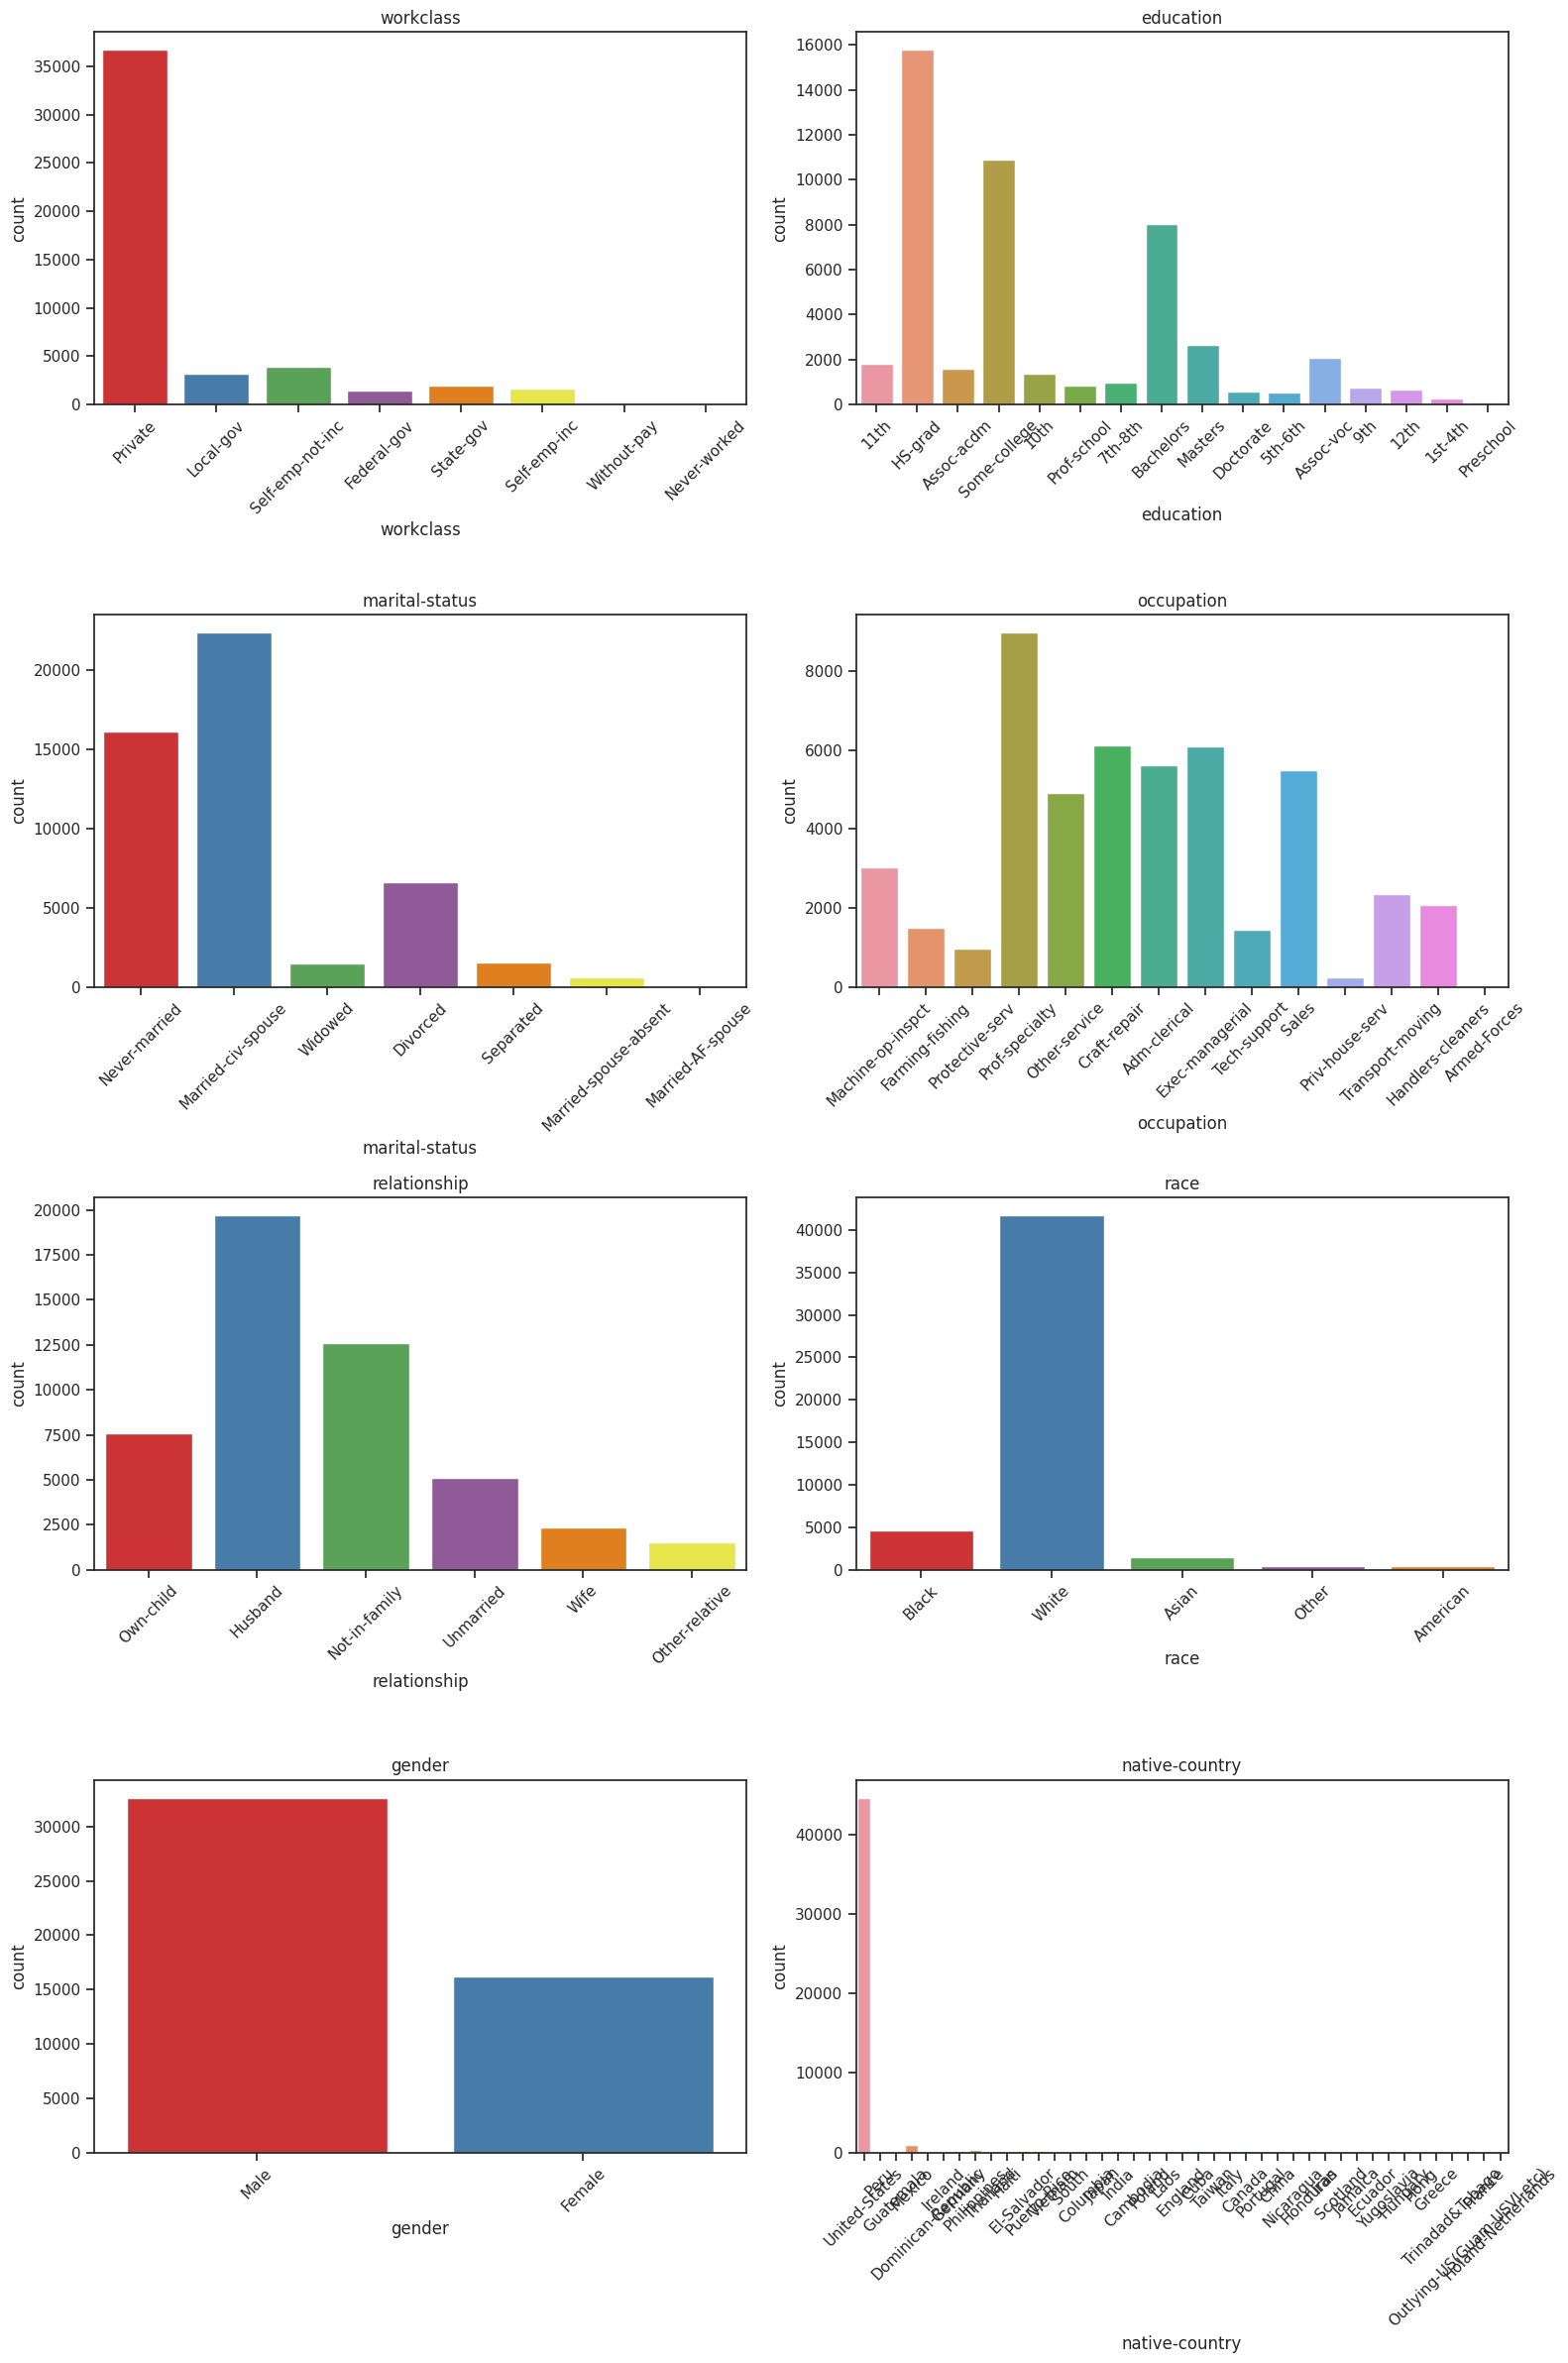

In [38]:

# Select the categorical variables
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Set the plot size
plt.figure(figsize=(16, 24))

# Loop through the categorical variables and create count plots
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 2, i+1)  # Adjust the subplot arrangement based on the number of variables
    sns.countplot(x=var, data=df3)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(var) 
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


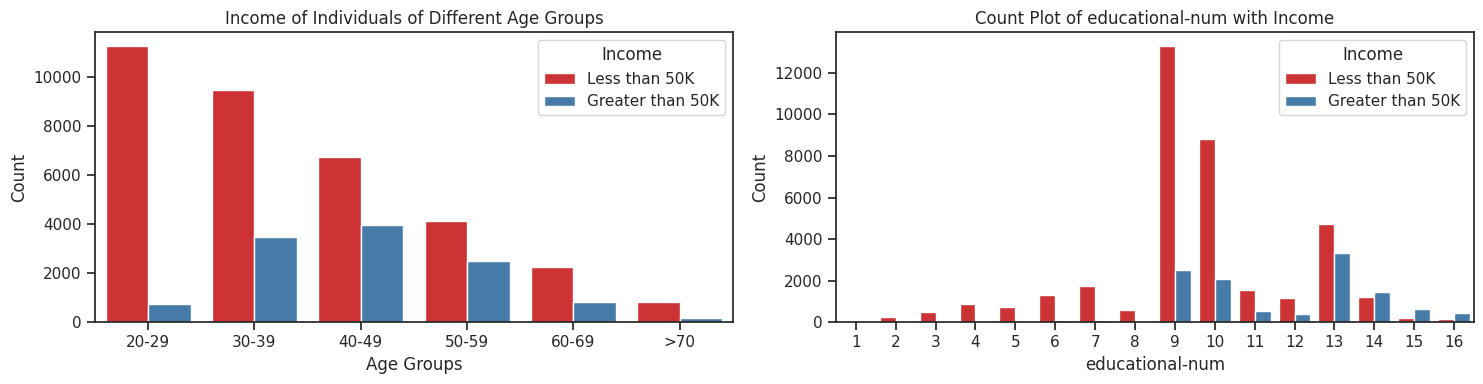

In [39]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))
df3['age_group'] = pd.cut(df3['age'], bins=[19, 29, 39, 49, 59, 69, 100], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '>70'])

# Count plot for 'age_group' 
sns.countplot(data=df3, x='age_group', hue='income', ax=axs[0])
axs[0].set_title("Income of Individuals of Different Age Groups")
axs[0].set_xlabel("Age Groups")
axs[0].set_ylabel("Count")
axs[0].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

# Count plot for 'educational-num' 
sns.countplot(data=df3, x='educational-num', hue='income', ax=axs[1])
axs[1].set_title("Count Plot of educational-num with Income")
axs[1].set_xlabel("educational-num")
axs[1].set_ylabel("Count")
axs[1].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

plt.tight_layout()
plt.show()


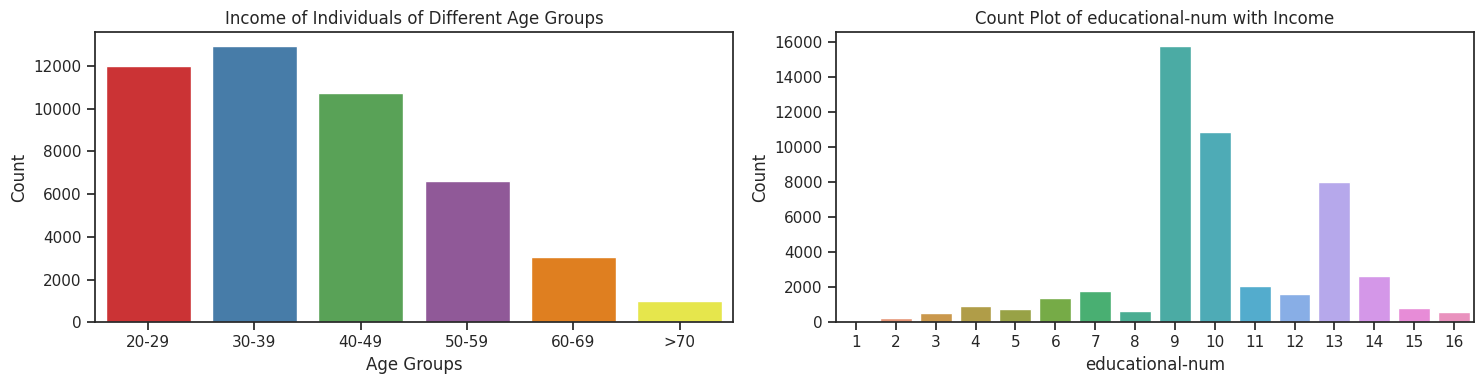

In [40]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))
df3['age_group'] = pd.cut(df3['age'], bins=[19, 29, 39, 49, 59, 69, 100], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '>70'])

# Count plot for 'age_group' 
sns.countplot(data=df3, x='age_group', ax=axs[0])
axs[0].set_title("Income of Individuals of Different Age Groups")
axs[0].set_xlabel("Age Groups")
axs[0].set_ylabel("Count")

# Count plot for 'educational-num' 
sns.countplot(data=df3, x='educational-num', ax=axs[1])
axs[1].set_title("Count Plot of educational-num with Income")
axs[1].set_xlabel("educational-num")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


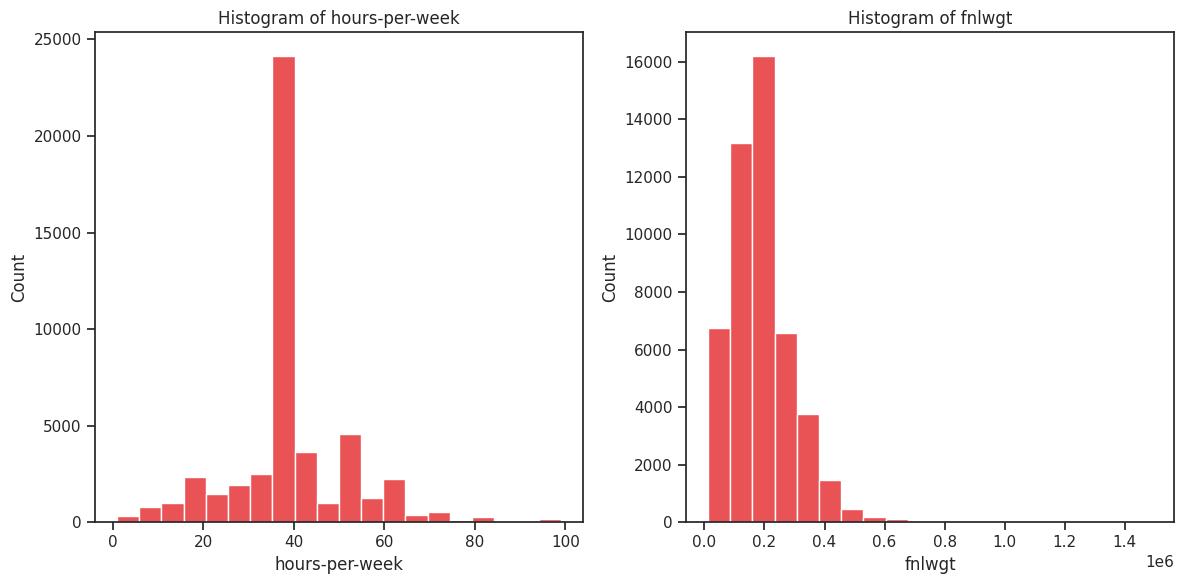

In [41]:
# Set the plot size and create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for 'hours-per-week'
sns.histplot(df3['hours-per-week'], bins=20, ax=axs[0])
axs[0].set_title("Histogram of hours-per-week")
axs[0].set_xlabel("hours-per-week")
axs[0].set_ylabel("Count")

# Histogram for 'fnlwgt'
sns.histplot(df3['fnlwgt'], bins=20, ax=axs[1])
axs[1].set_title("Histogram of fnlwgt")
axs[1].set_xlabel("fnlwgt")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


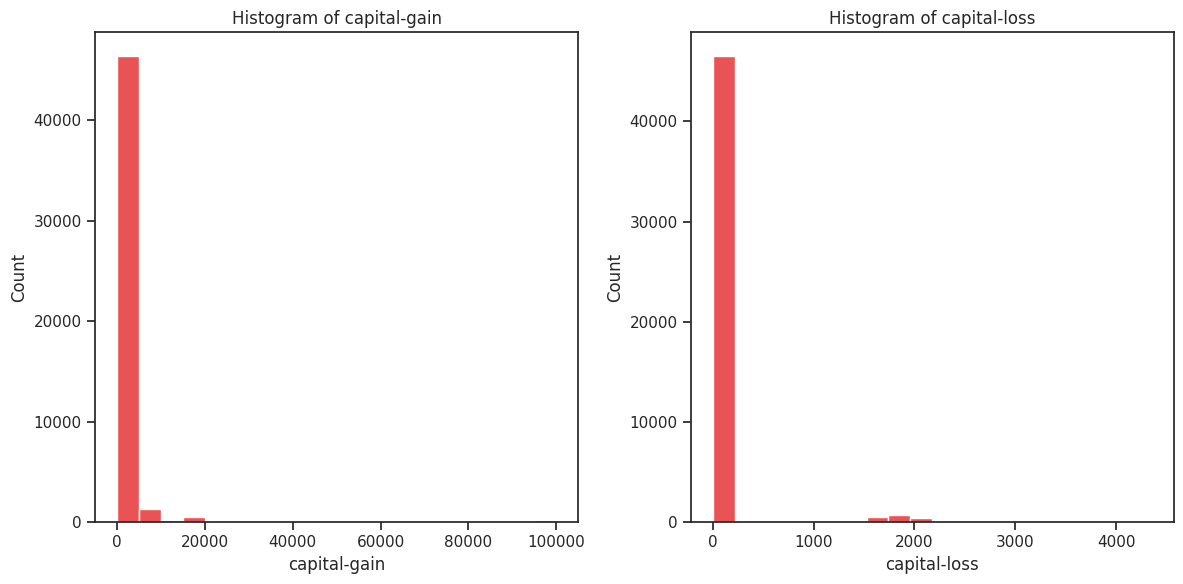

In [42]:
# Set the plot size and create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for 'capital-gain'
sns.histplot(df3['capital-gain'], bins=20, ax=axs[0])
axs[0].set_title("Histogram of capital-gain")
axs[0].set_xlabel("capital-gain")
axs[0].set_ylabel("Count")

# Histogram for 'capital-loss'
sns.histplot(df3['capital-loss'], bins=20, ax=axs[1])
axs[1].set_title("Histogram of capital-loss")
axs[1].set_xlabel("capital-loss")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


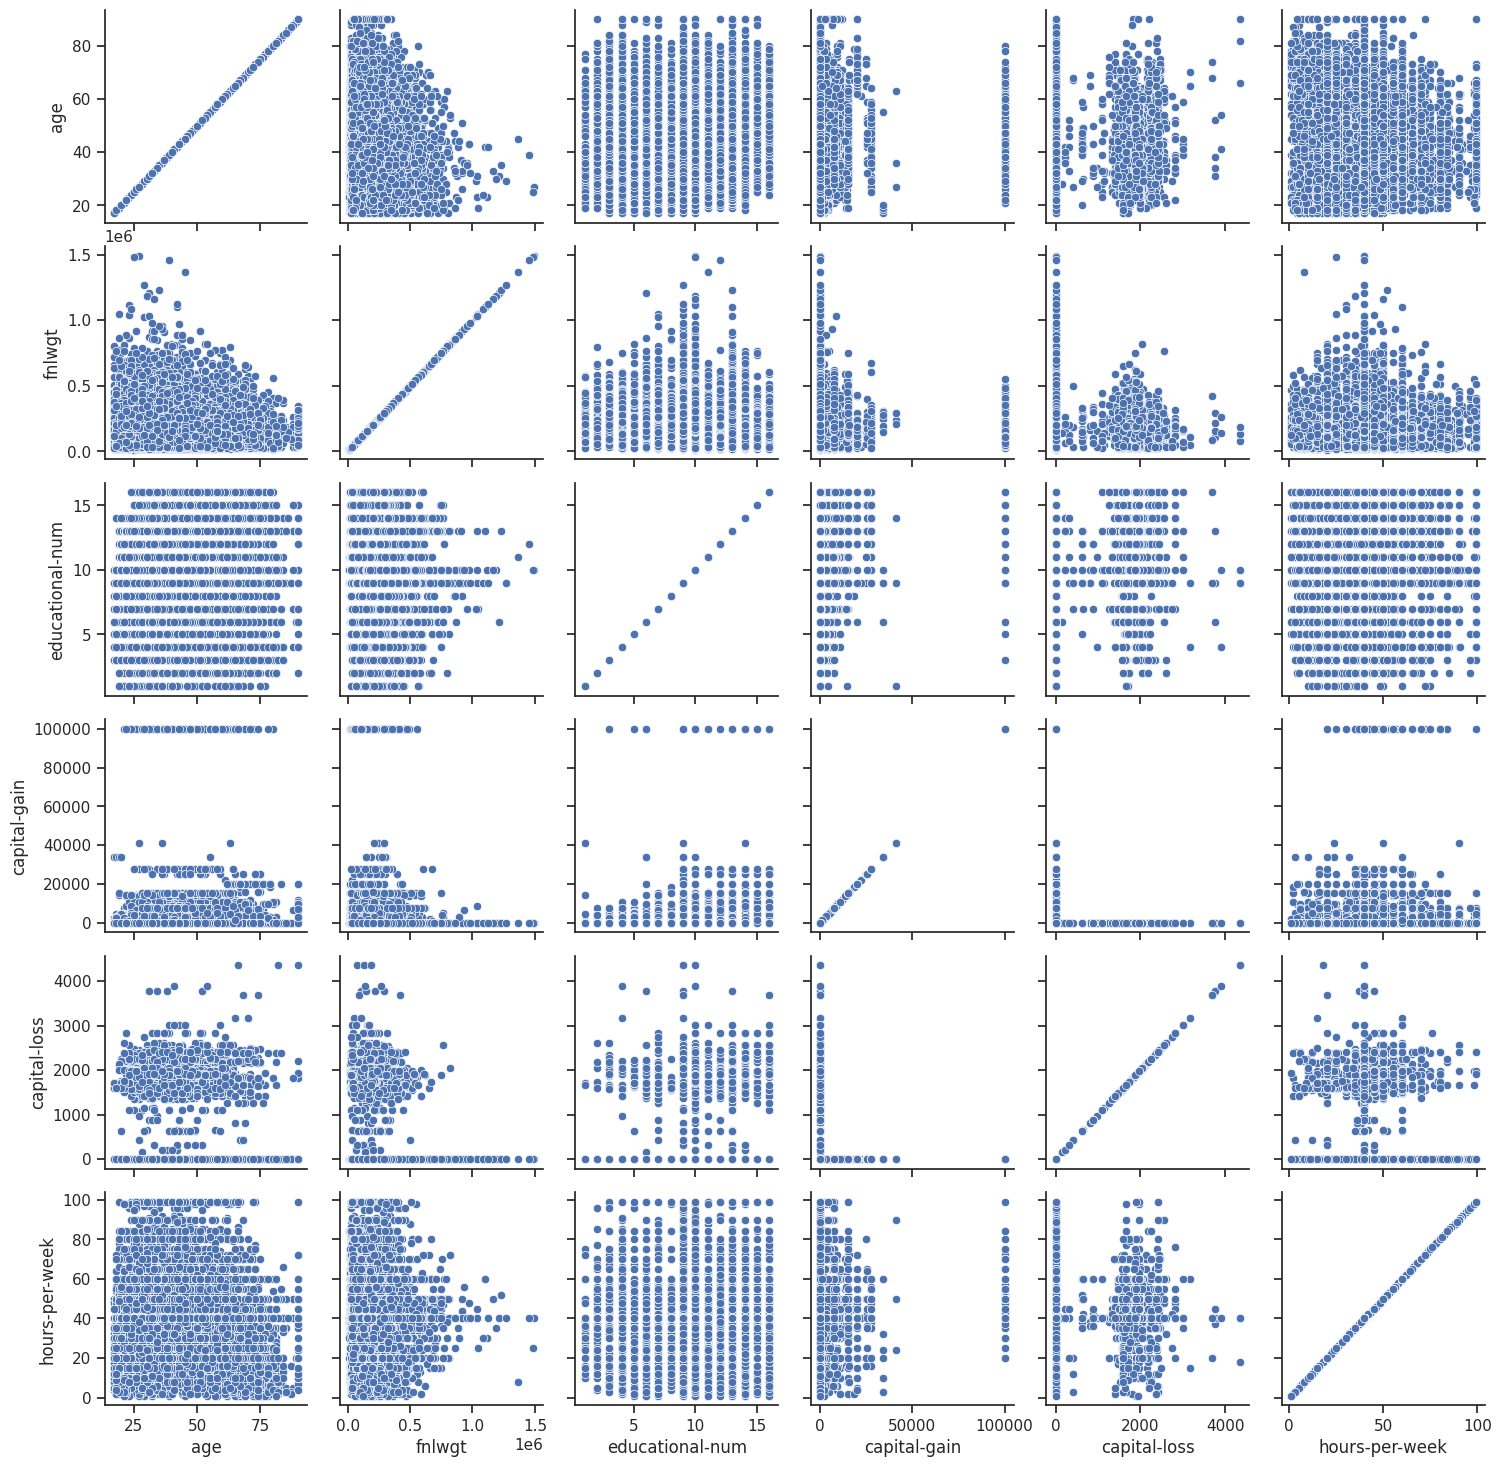

In [43]:

# Specify the column for coloring
column_to_color = 'workclass'

# Using PairGrid with hue and custom palette
sns.set(style='ticks', color_codes=True)
scatter_matrix = sns.PairGrid(df3)
scatter_matrix.map(sns.scatterplot, palette='Set1')

# Customize the color mapping for the specified column
colors = sns.color_palette('Set1', n_colors=df3[column_to_color].nunique())
for ax in scatter_matrix.axes.flat:
    if ax.get_xlabel() == column_to_color:
        for i, category in enumerate(df3[column_to_color].unique()):
            ax.scatter([], [], color=colors[i], label=category)
        ax.legend()

# Display the plot
plt.show()


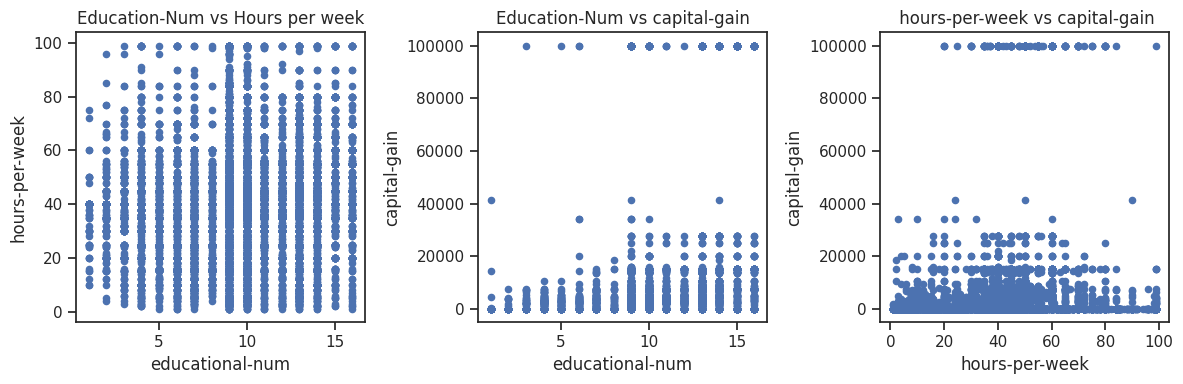

In [44]:


fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

# Educational-Num vs Hours per week scatter plot
df3.plot.scatter(ax=axs[0], x='educational-num', y='hours-per-week', title='Education-Num vs Hours per week')

# Educational-Num vs capital-gain
df3.plot.scatter(ax=axs[1], x='educational-num', y='capital-gain', title='Education-Num vs capital-gain')

# hours-per-week vs capital-gain
df3.plot.scatter(ax=axs[2],x='hours-per-week', y ='capital-gain', 
                title =' hours-per-week vs capital-gain')
plt.tight_layout()
plt.show()


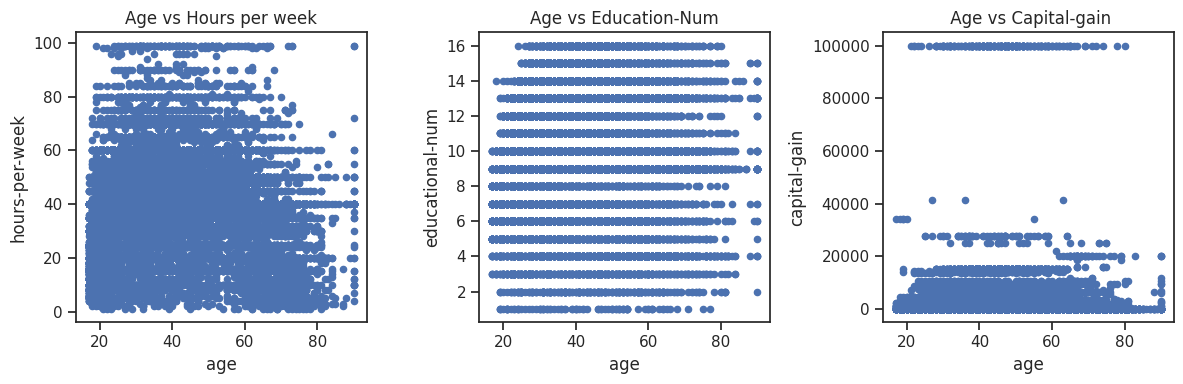

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(12,4))

# Scatter plot Age vs Hours per week 
df3.plot.scatter(ax=axs[0], x='age', y='hours-per-week', title='Age vs Hours per week')

# Scatter plot Age vs Education-Num
df3.plot.scatter(ax=axs[1], x='age', y='educational-num', title='Age vs Education-Num')

# Scatter plot Age vs capital-gain
df3.plot.scatter(ax=axs[2],x='age', y ='capital-gain', 
                title =' Age vs Capital-gain')
plt.tight_layout()
plt.show()


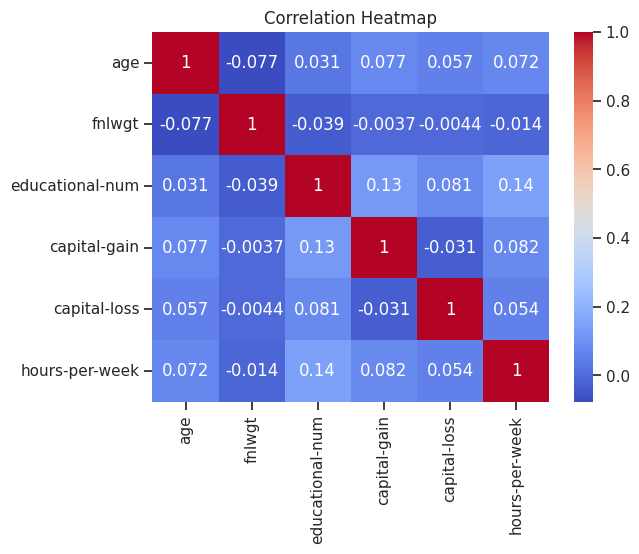

In [46]:
# Heatmap of Correlation between Numeric Features
numeric_features =df3.select_dtypes(include=['int64'])
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
